<a href="https://colab.research.google.com/github/Mostafa-Mohamed-Atef/movies-data-science/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
data = pd.read_csv('/content/cleaned_movies .csv')
data

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; over,notalk,notalk,0,13000000,25682380,42195766,2013fail,13000000,25682380,42195766,1,1
1,2012,tt1343727,dredd 3d,ok-disagree,ok,1,45000000,13414714,40868994,2012pass,45658735,13611086,41467257,1,1
2,2013,tt2024544,12 years a slave,notalk-disagree,notalk,0,20000000,53107035,158607035,2013fail,20000000,53107035,158607035,1,1
3,2013,tt1272878,2 guns,notalk,notalk,0,61000000,75612460,132493015,2013fail,61000000,75612460,132493015,1,1
4,2013,tt0453562,42,men,men,0,40000000,95020213,95020213,2013fail,40000000,95020213,95020213,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,1971,tt0067741,shaft,notalk,notalk,0,53012938,70327868,107190108,1971fail,305063707,404702718,616827003,9,5
1752,1971,tt0067800,straw dogs,notalk,notalk,0,25000000,10324441,11253821,1971fail,143862856,59412143,64760273,9,5
1753,1971,tt0067116,the french connection,notalk,notalk,0,2200000,41158757,41158757,1971fail,12659931,236848653,236848653,9,5
1754,1971,tt0067992,willy wonka &amp; the chocolate factory,men-disagree,men,0,3000000,4000000,4000000,1971fail,17263543,23018057,23018057,9,5


In [275]:
data.columns

Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code'],
      dtype='object')

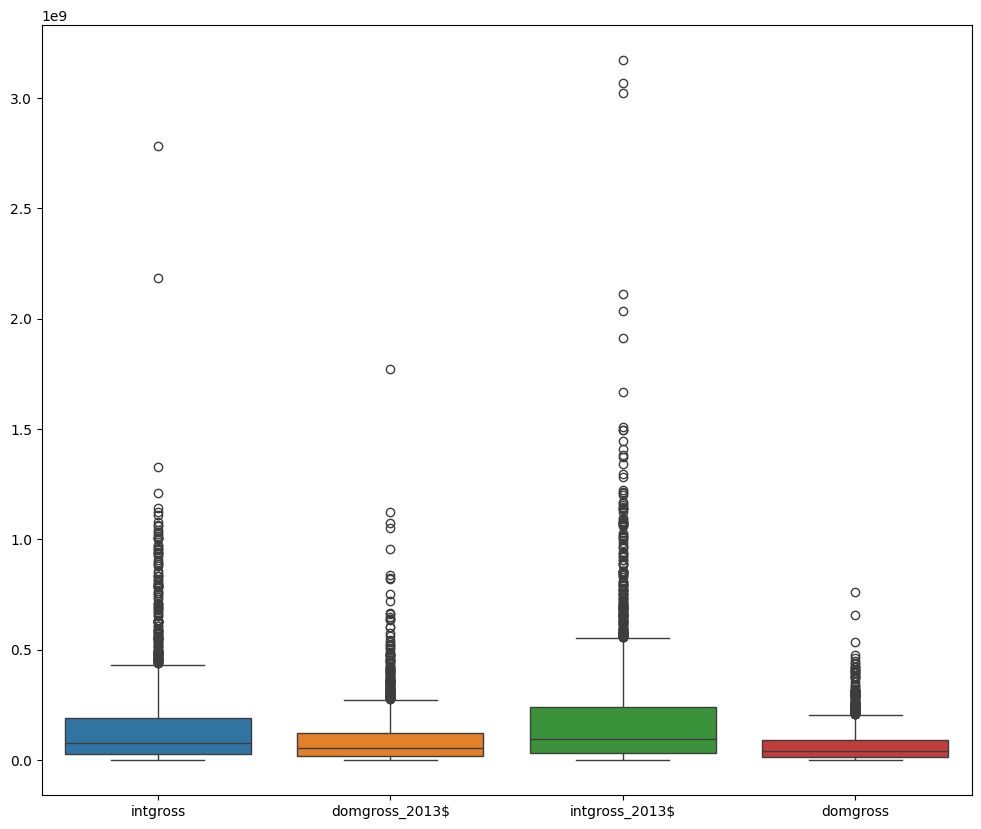

In [290]:
plt.figure(figsize=[12,10])
sns.boxplot(data[['intgross','domgross_2013$',
       'intgross_2013$','domgross']])
plt.show()

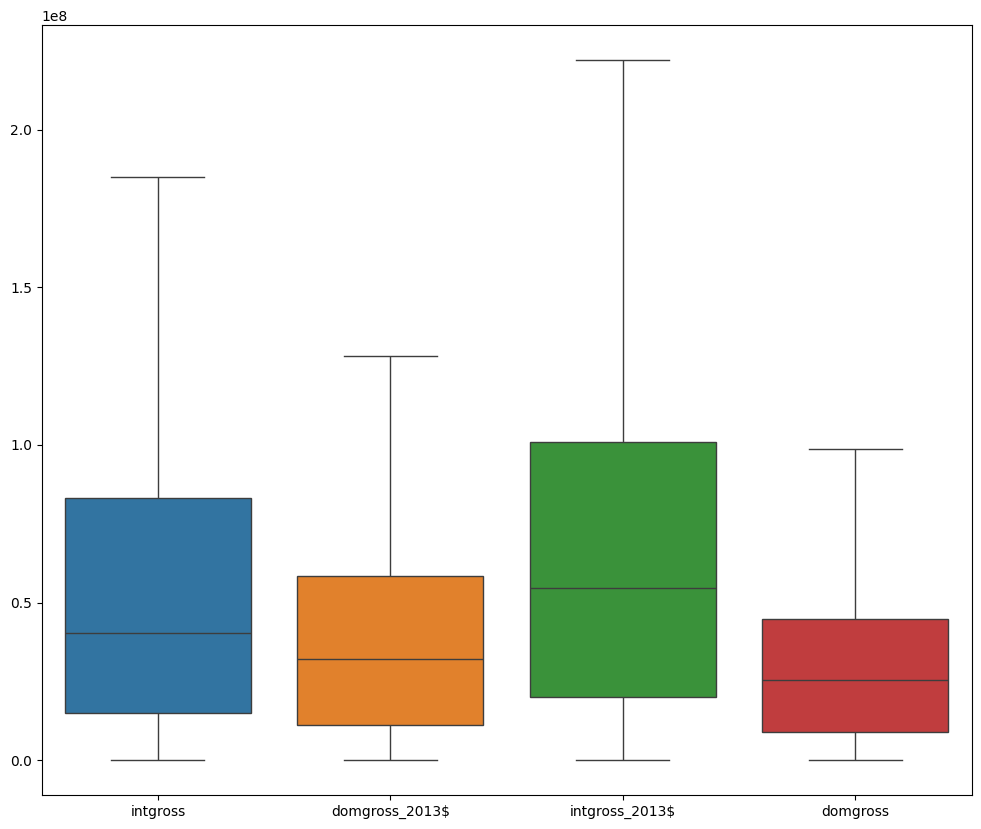

In [298]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    data_no_outliers = data[(data[column] >= (Q1 - 1.5 * IQR)) & (data[column] <= (Q3 + 1.5 * IQR))]
    return data_no_outliers

# Iteratively remove outliers from all columns
columns = ['intgross', 'domgross_2013$', 'intgross_2013$', 'domgross']
for column in columns:
    data = remove_outliers_iqr(data, column)

plt.figure(figsize=(12, 10))
sns.boxplot(data[columns])
plt.show()

<Axes: >

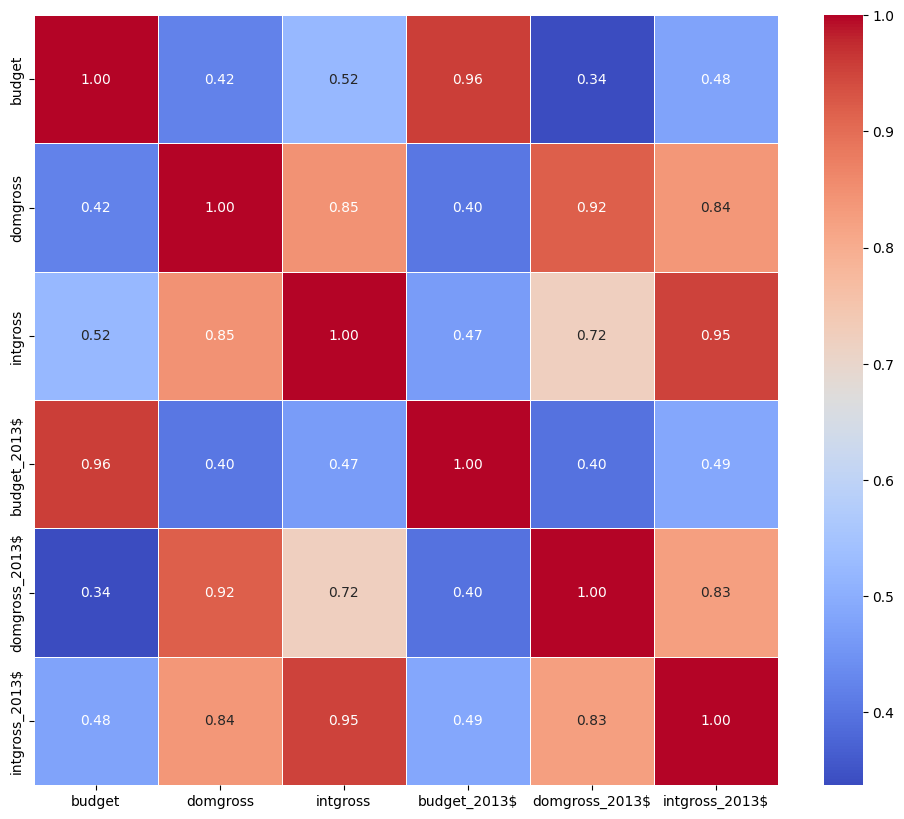

In [299]:
numerical_columns = [
'budget',
       'domgross', 'intgross','budget_2013$', 'domgross_2013$',
       'intgross_2013$'
]

correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [300]:
x = data[['intgross','domgross_2013$',
       'intgross_2013$']]
y = data['domgross'].values

In [301]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=44,shuffle = True)

print('x_train : ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

x_train :  (903, 3)
x_test:  (302, 3)
y_train :  (903,)
y_test :  (302,)


In [302]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)


linear_regression_model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)
linear_regression_model.fit(x_train_normalized, y_train)


LinearRegression(n_jobs=-1)

In [303]:
print(linear_regression_model.score(x_train_normalized,y_train))
print(linear_regression_model.score(x_test_normalized,y_test))

0.9763889056154758
0.9676831231782812


In [304]:
y_pred = linear_regression_model.predict(x_test_normalized)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error ,r2_score

mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 2252294.6547471755
mean squared error is 17419987612588.629
median absolute error is 1187547.6312718894
the r2 score 0.9676831231782812


In [305]:
from sklearn.tree import DecisionTreeRegressor

DTM = DecisionTreeRegressor(max_depth=10,random_state=33)
DTM.fit(x_train_normalized,y_train)

print(DTM.score(x_train_normalized,y_train))
print(DTM.score(x_test_normalized,y_test))

0.9976776900029415
0.9552740127376466


In [306]:
y_pred = DTM.predict(x_test_normalized)

mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 2912070.4757306166
mean squared error is 24108955465256.367
median absolute error is 1149231.5
the r2 score 0.9552740127376466


In [307]:
from sklearn.neighbors import KNeighborsRegressor

CLF = KNeighborsRegressor(11)
CLF.fit(x_train_normalized,y_train)


KNeighborsRegressor(n_neighbors=11)

In [308]:
print(CLF.score(x_train_normalized,y_train))
print(CLF.score(x_test_normalized,y_test))

0.9756361505752391
0.9708158753388572


In [309]:
y_pred = CLF.predict(x_test_normalized)

In [310]:
mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 2541989.2459361823
mean squared error is 15731318743638.139
median absolute error is 1673516.4090909073
the r2 score 0.9708158753388572
